In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [39]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [40]:
df = pd.read_csv('EcoPreprocessed.csv')

In [41]:
df.head()

,Unnamed: 0,review,polarity,division
0,3870,able play youtube alexa,0.5000,positive
1,62,able recognize indian accent really well drop ...,0.2794,positive
2,487,absolute smart device amazon connect external ...,0.1827,positive
3,3204,absolutely amaze new member family control hom...,0.3682,positive
4,1265,absolutely amaze previously sceptical invest m...,0.2333,positive


In [42]:
print(df.describe())

        Unnamed: 0     polarity
count  4084.000000  4084.000000
mean   2070.871205     0.350653
std    1203.976943     0.367858
min       0.000000    -1.000000
25%    1024.750000     0.006725
50%    2061.500000     0.383300
75%    3119.250000     0.607100
max    4156.000000     1.000000


In [6]:
print("Dataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084 entries, 0 to 4083
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4084 non-null   int64  
 1   review      4084 non-null   object 
 2   polarity    4084 non-null   float64
 3   division    4084 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 127.8+ KB
None


#### Drop columns that are not of use

In [7]:
df = df.drop(["Unnamed: 0","polarity"],axis =1)
df.head()

,review,division
0,able play youtube alexa,positive
1,able recognize indian accent really well drop ...,positive
2,absolute smart device amazon connect external ...,positive
3,absolutely amaze new member family control hom...,positive
4,absolutely amaze previously sceptical invest m...,positive


In [8]:
df.rename(columns={'division':'label'}, inplace=True)

In [9]:
df.head()

,review,label
0,able play youtube alexa,positive
1,able recognize indian accent really well drop ...,positive
2,absolute smart device amazon connect external ...,positive
3,absolutely amaze new member family control hom...,positive
4,absolutely amaze previously sceptical invest m...,positive


In [36]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             label  text_length
count  4084.000000  4084.000000
mean      0.632713    70.685357
std       0.684504    92.591252
min      -1.000000     2.000000
25%       1.000000    17.000000
50%       1.000000    42.000000
75%       1.000000    89.000000
max       1.000000  1306.000000


In [11]:
# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(df.head())


First Few Rows:
                                              review     label
0                            able play youtube alexa  positive
1  able recognize indian accent really well drop ...  positive
2  absolute smart device amazon connect external ...  positive
3  absolutely amaze new member family control hom...  positive
4  absolutely amaze previously sceptical invest m...  positive


In [12]:
print("\nUnique Value Counts:")
print(df.nunique())


Unique Value Counts:
review    3465
label        3
dtype: int64


In [13]:
df.isnull().sum()

review    0
label     0
dtype: int64

#### It does not have any null values

In [14]:
# Get unique values of label
df['label'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

####   #Convert labels to numeric values if they are in text format (e.g., 'positive', 'negative', 'neutral' -> 1, -1, 0)


In [15]:
label_mapping = {'positive': 1, 'negative': -1, 'neutral': 0}
df['label'] = df['label'].map(label_mapping)

In [16]:
df.head()

,review,label
0,able play youtube alexa,1
1,able recognize indian accent really well drop ...,1
2,absolute smart device amazon connect external ...,1
3,absolutely amaze new member family control hom...,1
4,absolutely amaze previously sceptical invest m...,1


In [17]:
# Get unique values of label
df['label'].unique()

array([ 1,  0, -1])

#### Visualize the distribution of the 'label' column 

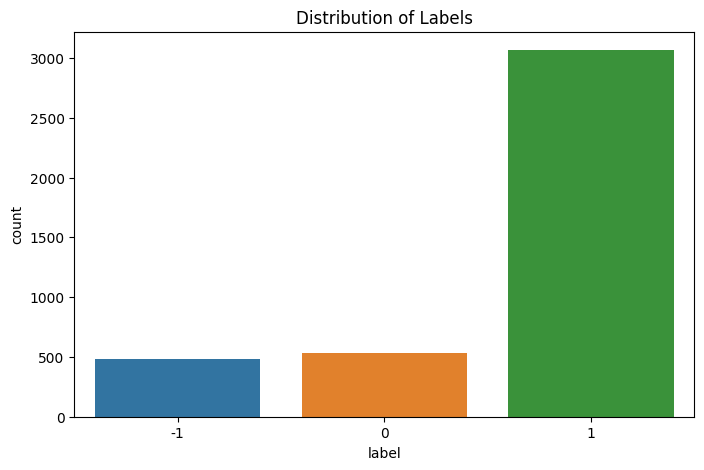

In [18]:

plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()

#### Visualize the distribution of text lengths

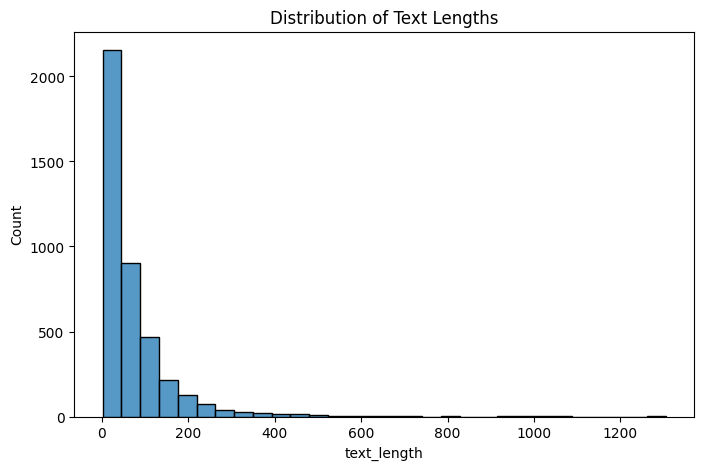

In [19]:

df['text_length'] = df['review'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='text_length', bins=30)
plt.title('Distribution of Text Lengths')
plt.show()

In [20]:
from wordcloud import WordCloud

In [21]:
# Combine all sentences into a single string
all_text = ' '.join(df['review'])


In [22]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

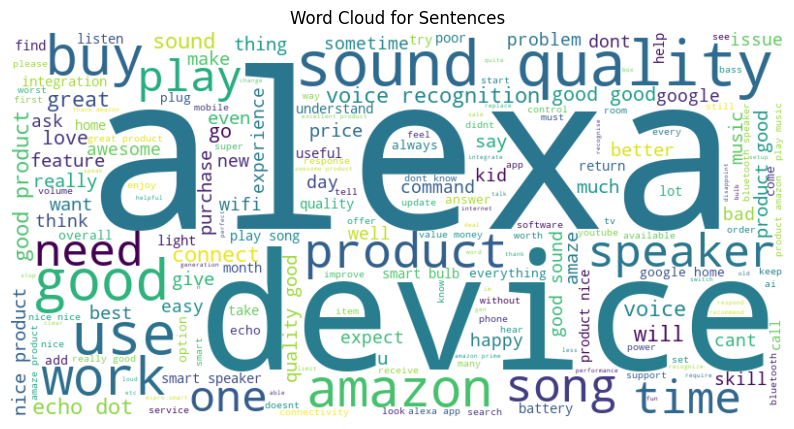

In [23]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Sentences')
plt.axis('off')
plt.show()

In [24]:
# Explore the relationship between numerical and categorical variables 

In [25]:

# plt.figure(figsize=(10, 6))
# sns.boxplot(x='review', y='label', data=df)
# plt.title('Box Plot of Numerical Column by Label')
# plt.xticks(rotation=45)
# plt.show()


#### Explore the distribution of text data by analyzing word frequency

In [26]:

from collections import Counter
import nltk
from nltk.corpus import stopwords



In [27]:
#### Tokenize the text and remove stopwords

In [35]:

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tokens = ' '.join(df['review']).split()
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]


[nltk_data] Error loading stopwords: <urlopen error [Errno 60]
[nltk_data]     Operation timed out>


In [29]:
#### Calculate word frequency


In [30]:
word_freq = Counter(filtered_tokens)


In [31]:
word_freq_list = list(word_freq.items())

In [32]:
word_freq_list

[('able', 60),
 ('play', 376),
 ('youtube', 62),
 ('alexa', 989),
 ('recognize', 60),
 ('indian', 51),
 ('accent', 10),
 ('really', 197),
 ('well', 122),
 ('drop', 10),
 ('function', 18),
 ('helpful', 37),
 ('call', 70),
 ('device', 383),
 ('talk', 53),
 ('person', 13),
 ('near', 5),
 ('smart', 349),
 ('plug', 63),
 ('schedule', 14),
 ('work', 458),
 ('seamlessly', 2),
 ('con', 19),
 ('would', 95),
 ('sound', 705),
 ('kindloud', 1),
 ('lack', 20),
 ('clarity', 27),
 ('mid', 4),
 ('frequency', 4),
 ('need', 294),
 ('tweeked', 1),
 ('optimum', 1),
 ('rarely', 3),
 ('doesnt', 176),
 ('respond', 56),
 ('absolute', 2),
 ('amazon', 488),
 ('connect', 308),
 ('external', 9),
 ('sub', 2),
 ('woofer', 4),
 ('amaze', 185),
 ('recons', 1),
 ('voice', 524),
 ('even', 137),
 ('close', 12),
 ('room', 65),
 ('like', 383),
 ('almost', 30),
 ('collection', 7),
 ('songs', 218),
 ('english', 36),
 ('hindi', 71),
 ('must', 77),
 ('quite', 41),
 ('moneys', 1),
 ('worth', 125),
 ('absolutely', 18),
 ('new',

In [33]:
# Display the most common words
common_words = word_freq.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])



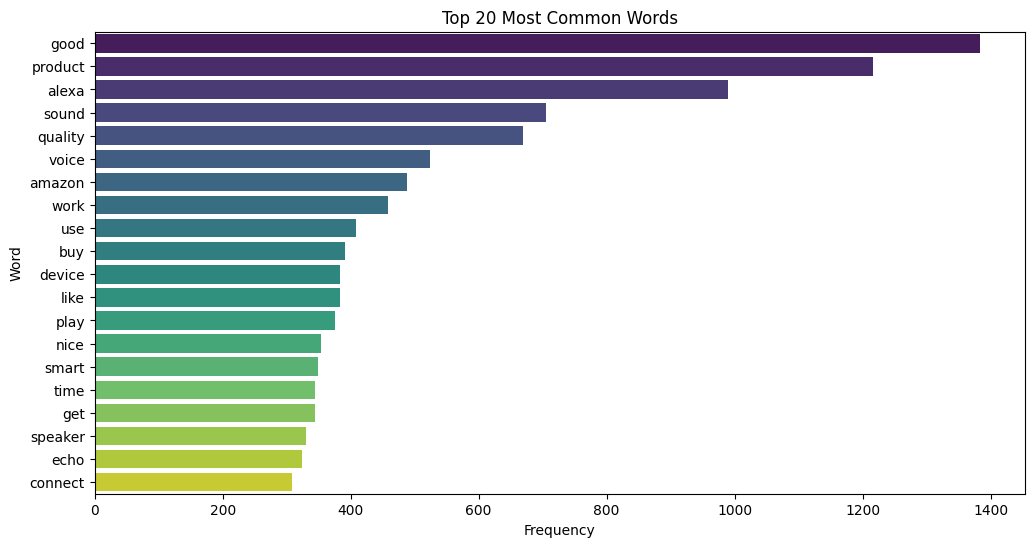

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='viridis')
plt.title('Top 20 Most Common Words')
plt.show()